## 💠 **Parte 2: Olist**

**Desafio:** Criar um notebook de análise exploratória (como fizemos na nossa aula de hoje) com todas as etapas de coleta, limpeza, análise e visualização com base de dados da Olist.

**Requisitos:**

    🔸 Formular no mínimo **2 perguntas** (caso queira se desafiar crie pelo menos mais perguntas além das 2 obrigatórias) para responder com suas análises;
    🔸 Utilizar pelo menos **3 bases de dados da Olist** (caso você deseje criar sua base do zero). Caso deseje continuar utilizando a que criamos em aula, é necessário incluir pelo menos mais **1 tabela** para enriquecer sua análise.

**Para responder as perguntas elaboradas usar:**

    🔸 Criar pelo menos **2 gráficos**.
    🔸 Exporte sua base final em csv.
◾ Submeta uma pasta que contenha:
    🔸 o arquivo **seu_nome.ipynb** com sua análise exploratória;
    🔸 a base final criada por você no formato .csv;

**Dicas:**

    🔸 Use os conhecimentos da aula para realizar a análise e as visualizações.
    🔸 Use as funções do Pandas para manipular os dados.
    🔸 Seja criativa e explore os dados para encontrar insights interessantes!

**Boa sorte!**

# Perguntas para análise:

* 1 - Qual o ticket médio diário,mensal e anual?
* 2 - Qual o ano teve o maior número de vendas em valor?
* 3 - Qual estado teve mais vendas?
* 4 - Pedidos cancelados por estado?
* 5 - Qual o produto mais vendido ?
* 6 - Qual vendedor com mais vendas ?

In [1]:
#importando as biblitecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#lendo os dados  pedidos

df_pedidos = pd.read_csv('../para-sala/dados/olist_orders_dataset.csv')
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [3]:
# lendo dados dos itens dos pedidos
df_itens_pedido = pd.read_csv('../para-sala/dados/olist_order_items_dataset.csv')
df_itens_pedido

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [4]:
df_olist_pedidos = pd.merge(df_pedidos, df_itens_pedido, on=['order_id'], how='inner')
df_olist_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [5]:
df_consumidor = pd.read_csv('../para-sala/dados/olist_customers_dataset.csv')
df_consumidor

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [6]:
# combinando os  dois  DataFrames em um único DataFrame, com base na colunas'customer_id.
df_olist_pedidos_uf = pd.merge(df_olist_pedidos, df_consumidor, on=['customer_id'], how='inner')
df_olist_pedidos_uf

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


# * Iniciando a limpeza dos dados

In [7]:
# informações dos  dados
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
# criando uma lista com a colunas que não seram utilizadas e excluindo do df
columns_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
df_pedidos = df_pedidos.drop(columns_drop, axis=1)
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [9]:
# Verificando os status disponíveis da df
df_pedidos['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [10]:
# Verificando a quantidade de pedidos finalizados
df_pedidos[df_pedidos['order_status'] == 'delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [11]:
# Verificando a quantidade de  pedidos cancelados
df_pedidos[df_pedidos['order_status'] == 'canceled']



,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,NaN
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,NaN
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,NaN
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN
...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,NaN
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,NaN
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN


In [12]:
# Filtrando somente pedidos finalizados, percebemos que perdemos um número razoável de linhas, cerca de 3 mil.
# Agora, com nosso dataset filtrado, precisamos resetar o seu index:
df_pedidos = df_pedidos.reset_index(drop=True)
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [13]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_delivered_customer_date  96476 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [14]:
# transformando a colunas de datas que estão como string em datatime: 
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])

#Criando a colunas com mês e ano por iremmos usar para nossa análise
df_pedidos['reference_month_year'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'].dt.strftime('%Y-%m'))
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01


In [15]:
# verificando o dados 
df_itens_pedido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
# Verificando os dados
df_consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [17]:
#excluindo a coluna
df_consumidor = df_consumidor.drop('customer_unique_id', axis=1)
df_consumidor

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS


In [18]:
# Por padrão é realizado o merge dos dados com o inner join
# Jutando os df pedidos e itens de pedidos
df_olist = pd.merge(df_pedidos, df_itens_pedido, on='order_id', how='inner')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month_year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [19]:
# Jutando agora com os dados de consumidor
df_olist = pd.merge(df_olist, df_consumidor, on='customer_id', how='inner')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month_year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,11722,praia grande,SP
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,45920,nova vicosa,BA
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,28685,japuiba,RJ
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,28685,japuiba,RJ


In [20]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_delivered_customer_date  110196 non-null  datetime64[ns]
 5   reference_month_year           112650 non-null  datetime64[ns]
 6   order_item_id                  112650 non-null  int64         
 7   product_id                     112650 non-null  object        
 8   seller_id                      112650 non-null  object        
 9   shipping_limit_date            112650 non-null  object        
 10  price                          112650 non-null  float64       
 11  

In [21]:
# Aqui estamos buscando uma estatística descritiva, podemos utilizar a nossa função describe() para trazer essas informações
df_olist.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,112650,2018-01-01 00:09:48.464376320,2016-09-04 21:15:19,2017-09-13 19:17:04,2018-01-19 23:02:16,2018-05-04 17:30:36.750000128,2018-09-03 09:06:57,NaN
order_delivered_customer_date,110196,2018-01-14 13:25:24.023939328,2016-10-11 13:46:32,2017-09-26 20:09:44.500000,2018-02-02 20:57:23,2018-05-15 20:09:21.500000,2018-10-17 13:22:46,NaN
reference_month_year,112650,2017-12-16 19:30:46.689746944,2016-09-01 00:00:00,2017-09-01 00:00:00,2018-01-01 00:00:00,2018-05-01 00:00:00,2018-09-01 00:00:00,NaN
order_item_id,112650.0,1.197834,1.0,1.0,1.0,1.0,21.0,0.705124
price,112650.0,120.653739,0.85,39.9,74.99,134.9,6735.0,183.633928
freight_value,112650.0,19.99032,0.0,13.08,16.26,21.15,409.68,15.806405
customer_zip_code_prefix,112650.0,35119.30909,1003.0,11310.0,24340.0,59028.75,99990.0,29866.120801


In [34]:
df_olist.to_csv('Base_final_2_olist.csv',index=False)

# Perguntas :
* 1 - Qual o ticket médio diário,mensal e anual?
* 2 - Qual o ano teve o maior número de vendas em valor?
* 3 - Qual estado teve mais vendas?
* 4 - Pedidos cancelados por estado?
* 5 - Qual o produto mais vendido ?
* 6 - Qual vendedor com mais vendas ?

# 1 - Qual o ticket médio diário,mensal e anual?

In [22]:
#verificando o ticket média mensal
mes_filter = df_olist['reference_month_year'].dt.month
ticket_médio_mensal = df_olist.groupby(mes_filter)['price'].mean()
ticket_médio_mensal



reference_month_year
1     116.811441
2     113.424268
3     121.026811
4     127.270380
5     124.582441
6     121.767462
7     120.018836
8     117.507650
9     129.147179
10    125.545662
11    116.592195
12    117.914895
Name: price, dtype: float64

In [23]:
#verificando o ticket média anual
ticket_médio_anual = df_olist['reference_month_year'].dt.year
ticket_médio_anual = df_olist.groupby(ticket_médio_anual)['price'].mean()
ticket_médio_anual


reference_month_year
2016    134.556541
2017    121.024831
2018    120.262648
Name: price, dtype: float64

In [24]:
#Verificando o ticket médio diário
ticket_médio_diario = df_olist['reference_month_year'].dt.day
ticket_médio_diario = df_olist.groupby(ticket_médio_diario)['price'].mean()
ticket_médio_diario


reference_month_year
1    120.653739
Name: price, dtype: float64

# 2 - Qual o ano teve o maior número de vendas em valor?

In [25]:
# Verificando total de vendas por ano
vendas_anual = df_olist['reference_month_year'].dt.year
total_vendas_anual = df_olist.groupby(vendas_anual)['price'].sum()
total_vendas_anual


reference_month_year
2016      49785.92
2017    6155806.98
2018    7386050.80
Name: price, dtype: float64

C:\Users\Ellen\AppData\Local\Temp\ipykernel_548\2906726191.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_olist,


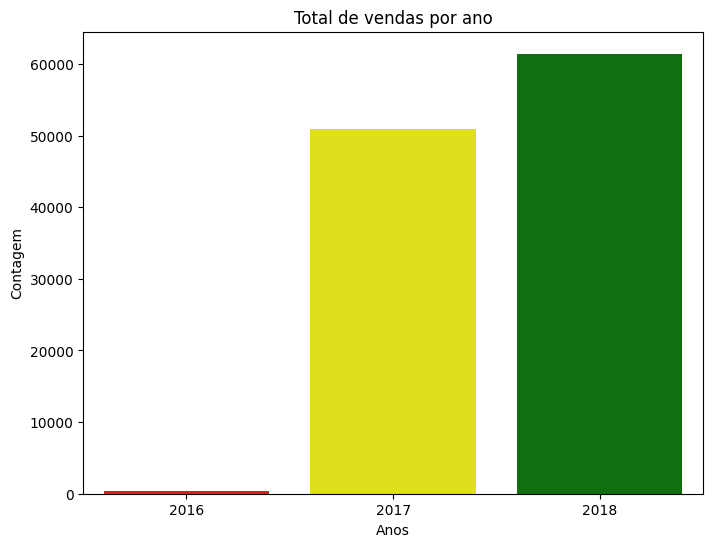

In [26]:
# definir tamanho da figura
plt.figure(figsize=(8, 6))

# definindo uma lista de cores para o gráfico
cores = ['red', 'yellow', 'green']
# instanciar o tipo de plotagem, no caso, um countplot usando x como os anos
sns.countplot(data = df_olist,
              x = vendas_anual,
              palette=cores)

# definir texto do título e eixos x e y
plt.title('Total de vendas por ano')
plt.xlabel('Anos')
plt.ylabel('Contagem')
plt.show()

# 3 - Qual o estado teve mais vendas?

In [27]:
#Verificando as cidades
df_olist['customer_state'].unique()

array(['SP', 'BA', 'GO', 'RN', 'PR', 'RS', 'RJ', 'MG', 'SC', 'RR', 'PE',
       'TO', 'CE', 'DF', 'SE', 'MT', 'PB', 'PA', 'RO', 'ES', 'AP', 'MS',
       'MA', 'PI', 'AL', 'AC', 'AM'], dtype=object)

In [28]:
# verificando em qual cidade tem mais vendas
regiao = df_olist['customer_state'].mode()
regiao


0    SP
Name: customer_state, dtype: object

In [29]:


# Filtrando as vendas finalizadas
vendas_finalizadas = df_olist[df_olist['order_status'] == 'delivered']

# Agrupa as vendas finalizadas por estado e conta o número de pedidos
venda_regiao = vendas_finalizadas.groupby('customer_state').size().reset_index(name='total_vendas')

venda_regiao



,customer_state,total_vendas
0,AC,91
1,AL,427
2,AM,163
3,AP,81
4,BA,3683
5,CE,1426
6,DF,2355
7,ES,2225
8,GO,2277
9,MA,800


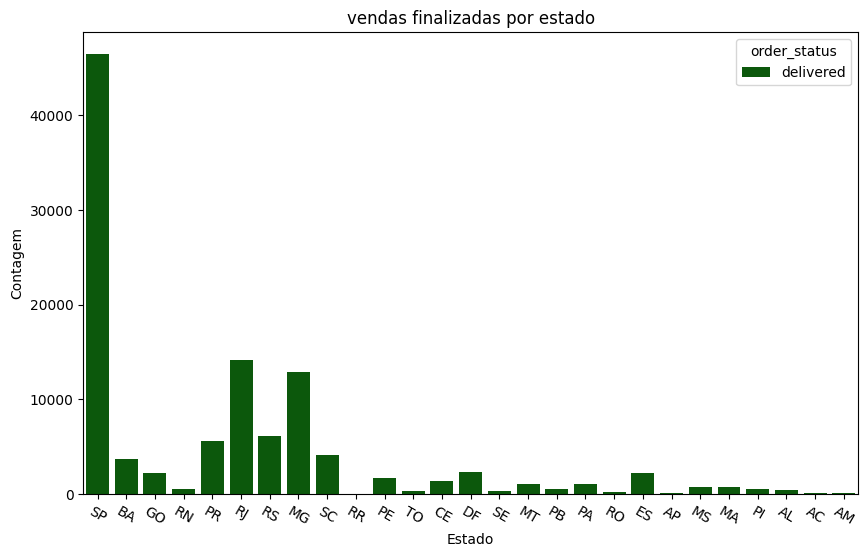

In [30]:

# filtrando a df para pegar somenre os pedidos finalizados por estado
df_filtered = df_olist[(df_olist['order_status'] == 'delivered')]

# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os tipos status do pedido e estado
sns.countplot(data = df_filtered,
              x = 'customer_state', 
              hue = 'order_status',
              palette=['#006400'])

# como o texto do eixo x é longo, podemos rotacioná-lo para melhorar a visualização
plt.xticks(rotation=330)

# definir texto do título e eixos x e y

plt.title('vendas finalizadas por estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'order_status')


plt.show()

# 4 - Pedidos cancelados por estado?

In [31]:

# Filtrando as vendas finalizadas
vendas_canceladas = df_olist[df_olist['order_status'] == 'canceled']

# Agrupa as vendas finalizadas por estado e conta o número de pedidos
venda_canceladas_região = vendas_canceladas.groupby('customer_state').size().reset_index(name='total_vendas')

venda_canceladas_região


,customer_state,total_vendas
0,BA,14
1,CE,4
2,DF,9
3,ES,8
4,GO,10
5,MA,4
6,MG,56
7,MS,1
8,MT,1
9,PA,1


NameError: name 'ax' is not defined

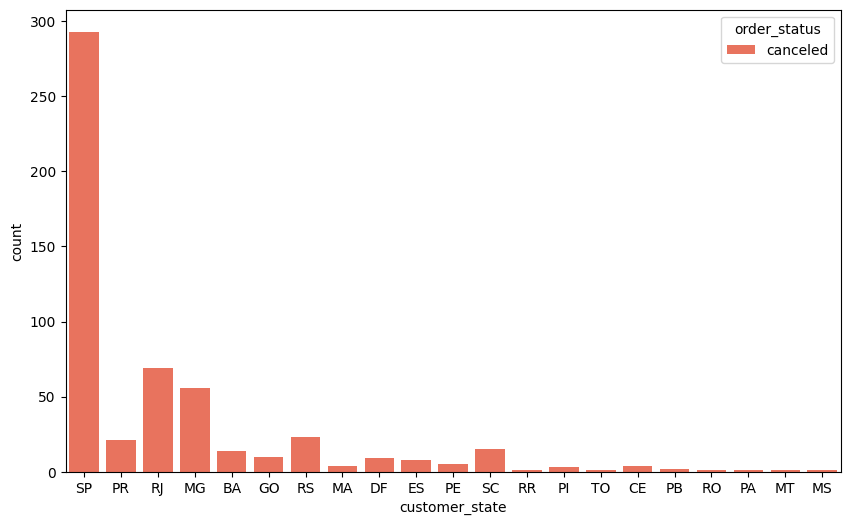

In [32]:
#fazendo filtro do df para pegar somente os pedidos cancelados por estado
df_filtered = df_olist[(df_olist['order_status'] == 'canceled')] 

# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os tipos status do pedido e estado

sns.countplot(data = df_filtered,
              x = 'customer_state', 
              hue = 'order_status',
            palette=['#FF6347'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

# como o texto do eixo x é longo, podemos rotacioná-lo para melhorar a visualização
plt.xticks(rotation=330)

# definir texto do título e eixos x e y

plt.title('Vendas canceladas por estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title='order_status')

plt.show()

# 5 - Qual o produto mais vendido ?

In [30]:
df_olist.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month_year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,47813,barreiras,BA


In [36]:
produto_mais_vendido = df_olist['product_id'].mode()
produto_mais_vendido

'aca2eb7d00ea1a7b8ebd4e68314663af'

In [44]:
contagem_vendas = df_olist[(df_olist['product_id'] == 'aca2eb7d00ea1a7b8ebd4e68314663af')]
contagem_vendas

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month_year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state
49,25f4376934e13d3508486352e11a5db0,12fd2740039676063a874b9567dfa651,delivered,2018-05-17 16:59:11,2018-05-21 15:22:11,2018-05-01,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-22 01:17:39,69.9,12.43,12230,sao jose dos campos,SP
229,6d7de866a140b19d09e825b2a4e944c7,9e5ce657315b2bdb94033a494041ac25,delivered,2018-04-16 21:07:16,2018-04-24 20:38:55,2018-04-01,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-22 22:10:15,69.9,0.00,88132,palhoca,SC
230,6d7de866a140b19d09e825b2a4e944c7,9e5ce657315b2bdb94033a494041ac25,delivered,2018-04-16 21:07:16,2018-04-24 20:38:55,2018-04-01,2,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-22 22:10:15,69.9,0.00,88132,palhoca,SC
257,a0d5b8474423ddf55228373b81a46272,3f7d26944f7f68bd2ac23b5e8b500ab0,delivered,2018-01-11 16:51:17,2018-01-22 21:18:33,2018-01-01,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-19 02:38:34,69.9,19.98,79112,campo grande,MS
734,f29d0fd6d4e6d5ce550e0b2f9335116c,55216cd56c9eaadec16f03d5aaf11d86,delivered,2018-05-17 16:34:49,2018-06-09 00:14:23,2018-05-01,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-22 02:59:02,69.9,0.00,99435,campos borges,RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110479,1f52d261d5a103a2a2375c21c99cd08d,6ec06eba01982607b43609eae1f3798b,delivered,2018-05-09 12:27:01,2018-05-11 20:57:36,2018-05-01,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-11 12:55:48,69.9,12.43,4816,sao paulo,SP
110497,9d01fa0e65583ec53f3864ee0e73d015,91d8e6ba148d6e55b4bb98a7af766101,delivered,2018-02-13 21:54:39,2018-03-17 14:36:27,2018-02-01,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-02-21 20:50:28,69.9,19.98,24744,sao goncalo,RJ
111250,15847be2cbb3423e9344e53b040ef2a6,38658a45235ad07f51a84607654e53f1,delivered,2018-01-13 00:21:59,2018-02-01 01:53:10,2018-01-01,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-19 00:31:14,69.9,29.90,57083,maceio,AL
111619,ac88d96f79bb0884df747b9c38fe48f7,ced8f3419d9a7d7fec840b843b36d6c2,delivered,2018-03-11 18:14:17,2018-04-15 15:28:40,2018-03-01,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-03-16 18:28:00,69.9,21.57,24935,marica,RJ


# 6 - Qual vendedor com mais vendas ?

In [52]:
#Verificando o id do vendedor com mais vendas
vendedor_mais_vendas = df_filtered['seller_id'].mode()
vendedor_mais_vendas

0    6560211a19b47992c3666cc44a7e94c0
Name: seller_id, dtype: object

In [54]:
#Verificando a quantidade de vendas 
contagem_vendendedor = df_filtered[(df_filtered['seller_id'] == '6560211a19b47992c3666cc44a7e94c0')]
contagem_vendendedor

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month_year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state
92,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,delivered,2018-08-26 22:04:34,2018-08-29 12:40:53,2018-08-01,1,c3ba4e8d3cb30049213b682e751e9d00,6560211a19b47992c3666cc44a7e94c0,2018-08-30 04:10:18,93.00,7.91,2407,sao paulo,SP
93,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,delivered,2018-08-26 22:04:34,2018-08-29 12:40:53,2018-08-01,2,c3ba4e8d3cb30049213b682e751e9d00,6560211a19b47992c3666cc44a7e94c0,2018-08-30 04:10:18,93.00,7.91,2407,sao paulo,SP
135,0c6b011f8a4f87010c23995f5807d152,a78b75a2ad06180de06b82857ca442b3,delivered,2018-08-20 18:24:30,2018-08-28 13:43:41,2018-08-01,1,1600dcf1cea8c0c83702e07b577ab231,6560211a19b47992c3666cc44a7e94c0,2018-08-22 18:35:26,43.00,23.02,59123,natal,RN
276,7835af1856de332f2f3c9204b740a3a2,d1b370c90ad7dacb840010a6e89c7e89,delivered,2017-12-24 17:34:12,2018-01-03 21:12:08,2017-12-01,1,a1250bbcaa645885c9165eab1573b5c6,6560211a19b47992c3666cc44a7e94c0,2017-12-29 17:48:13,49.99,14.10,31710,belo horizonte,MG
330,8e9e2a5d159d5718b34b926a34a0498f,3e8da88b70b67f67a05f66a138bd7f14,delivered,2018-01-12 19:27:08,2018-01-17 22:08:50,2018-01-01,1,060f0122cdc8f25db4a0d7359fdae7b0,6560211a19b47992c3666cc44a7e94c0,2018-01-18 19:37:22,49.00,7.78,8570,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112282,ad369c5a6bd2534d48420216de8fd8f5,c4166318f0d95d4ff6e243c05b407d21,delivered,2018-01-29 15:19:13,2018-02-21 17:46:45,2018-01-01,1,dc52f0f5d3ec37a93eaf956cde4e5d2c,6560211a19b47992c3666cc44a7e94c0,2018-02-05 15:31:50,49.00,14.10,29024,vitoria,ES
112415,4e60165d68af3fa7c25bfa95ea5803ff,89e3b283612a5ceb826e2325d09e06d8,delivered,2017-07-25 14:39:56,2017-07-27 20:21:59,2017-07-01,1,d017a2151d543a9885604dc62a3d9dcc,6560211a19b47992c3666cc44a7e94c0,2017-07-31 14:50:23,49.00,7.78,4685,sao paulo,SP
112481,08d138a502fa05af63ac4005311484f9,bb3ef6ad2a44a8b8f5218b23475a0b32,delivered,2017-07-18 02:00:48,2017-08-03 17:23:49,2017-07-01,1,d017a2151d543a9885604dc62a3d9dcc,6560211a19b47992c3666cc44a7e94c0,2017-07-24 02:10:07,49.00,21.15,49050,aracaju,SE
112598,33baefa752f2d98a008d4330d306d3db,8b764335e86e1a8f8d3db9f119e03a79,delivered,2017-04-23 14:47:39,2017-05-05 13:26:31,2017-04-01,1,4a9947ec1fcec2b3321193ed5590e8cb,6560211a19b47992c3666cc44a7e94c0,2017-05-02 08:10:57,59.00,14.17,20550,rio de janeiro,RJ
